# Fire Evacuation System AI models

#### Raghad Bugshan, Lama, Asrar, Supervised by Dr.Asma cherif

## first : Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from random import seed
from random import random
from random import randint
from firebase import firebase
import pickle



## second: read the dataset

In [2]:
data=pd.read_csv('D:/DataSet/FINAL_DATASET_ed.csv')

### display the first rows of the dataset

In [291]:
data.head()

,Physical Disability,Respiratory Disease,Fire Growth Rate,Temperature,Carbon monoxide concentration\n,Carbon Dioxide concentration,Population,Link Length,Familiarity with Building Geometry,Joint -Muscle Disease,Body Type,Age,Heart Disease,Sex,Total Risk
0,2,1,5,3,4,1,1,3,2,2,1,2,2,2,4
1,2,1,1,2,4,1,2,1,2,2,1,2,1,1,2
2,2,2,4,3,5,2,2,3,2,1,2,3,1,1,5
3,2,1,2,1,3,1,4,2,2,2,3,1,1,1,2
4,1,2,3,1,1,2,2,3,1,2,2,2,1,1,2


### measuring data to see average data distribution

#### describe the main dataset


In [292]:
print(data["Total Risk"].min())

print(data["Total Risk"].max())

print(data["Total Risk"].mean())

1
5
2.974524872624363


In [473]:
data.describe()

,Physical Disability,Respiratory Disease,Fire Growth Rate,Temperature,Carbon monoxide concentration\n,Carbon Dioxide concentration,Population,Link Length,Familiarity with Building Geometry,Joint -Muscle Disease,Body Type,Age,Heart Disease,Sex,Total Risk
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.00000,199999.000000,199999.000000,199999.000000
mean,1.499002,1.500063,3.002435,2.497532,2.999140,1.996890,2.503528,1.998720,1.499532,1.498917,2.001475,1.99894,1.497152,1.500553,2.974525
std,0.500000,0.500001,1.415630,1.117822,1.415108,0.816172,1.116189,0.816894,0.500001,0.500000,0.816480,0.81660,0.499993,0.500001,0.925513
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2.000000
50%,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.00000,1.000000,2.000000,3.000000
75%,2.000000,2.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,2.000000,2.000000,3.000000,3.00000,2.000000,2.000000,4.000000
max,2.000000,2.000000,5.000000,4.000000,5.000000,3.000000,4.000000,3.000000,2.000000,2.000000,3.000000,3.00000,2.000000,2.000000,5.000000


### graph the distribution of the risk level in the main dataset


count    199999.000000
mean          2.974525
std           0.925513
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Total Risk, dtype: float64


,Physical Disability,Respiratory Disease,Fire Growth Rate,Temperature,Carbon monoxide concentration\n,Carbon Dioxide concentration,Population,Link Length,Familiarity with Building Geometry,Joint -Muscle Disease,Body Type,Age,Heart Disease,Sex,Total Risk
0,2,1,5,3,4,1,1,3,2,2,1,2,2,2,4
1,2,1,1,2,4,1,2,1,2,2,1,2,1,1,2
2,2,2,4,3,5,2,2,3,2,1,2,3,1,1,5
3,2,1,2,1,3,1,4,2,2,2,3,1,1,1,2
4,1,2,3,1,1,2,2,3,1,2,2,2,1,1,2


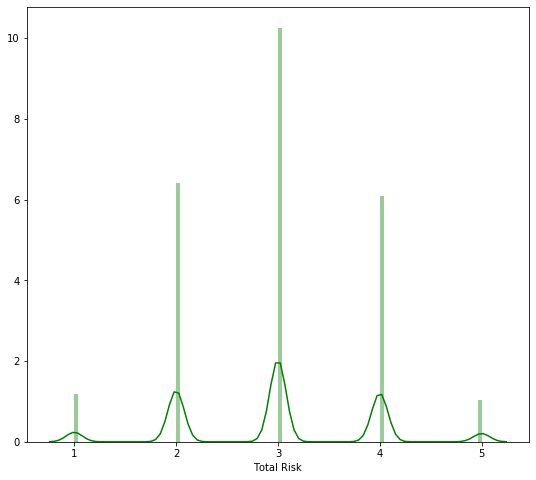

In [5]:
print(data['Total Risk'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['Total Risk'], color='g', bins=100, hist_kws={'alpha': 0.4});

list(set(data.dtypes.tolist()))

data_typ = data.select_dtypes(include = ['int64'])
data_typ.head()

#### the histogram and distribution of all the features


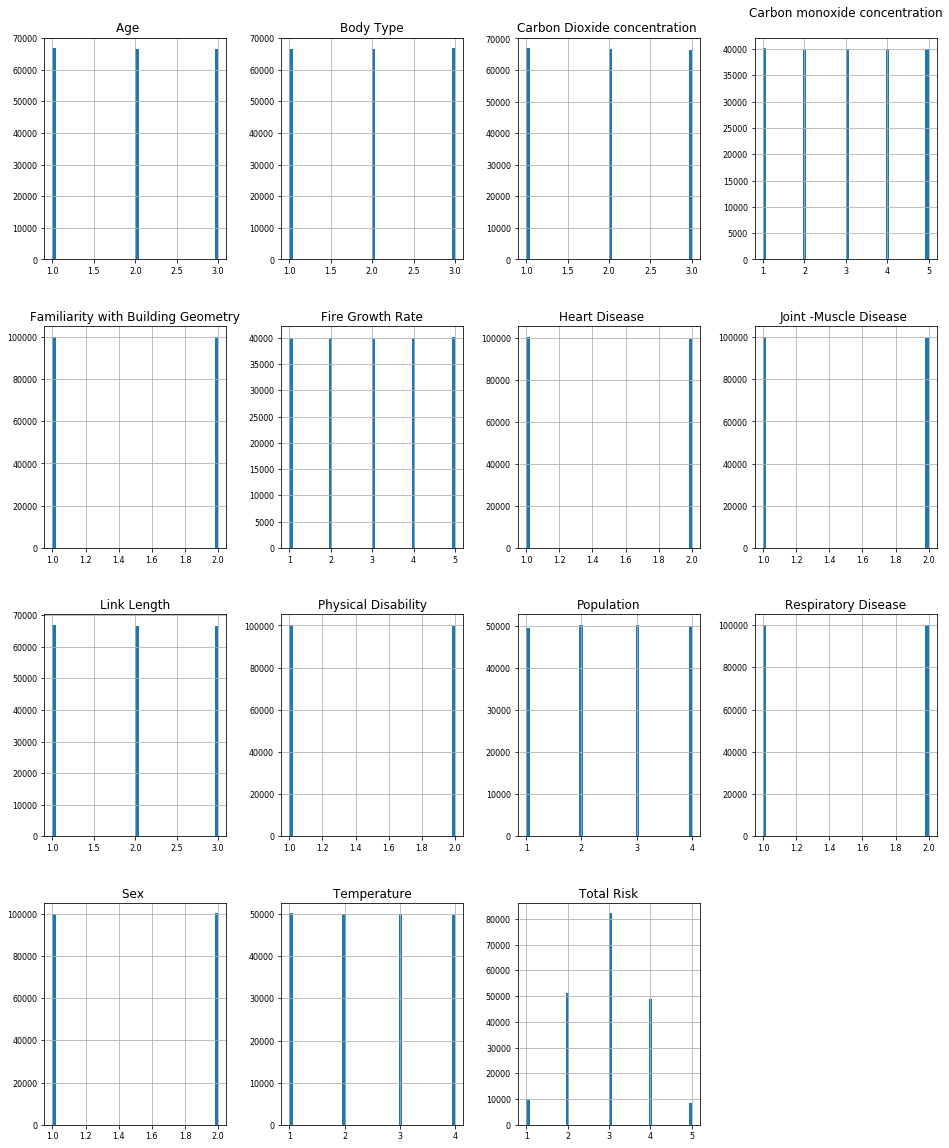

In [6]:
data_typ.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


### find the best or the strongest features that highly impact the risk level

In [7]:


data_typ_corr = data_typ.corr()['Total Risk'][:-1] 
golden_features_list =data_typ_corr[abs(data_typ_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Total Risk:\n{}".format(len(golden_features_list), golden_features_list))

There is 2 strongly correlated values with Total Risk:
Fire Growth Rate       0.589989
Physical Disability    0.544562
Name: Total Risk, dtype: float64


#### find the relation of each feature with the total risk 


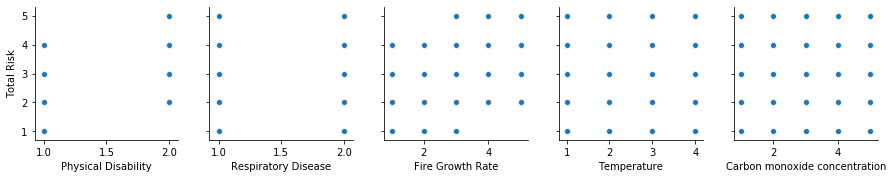

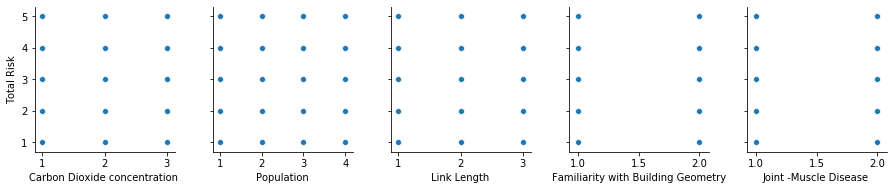

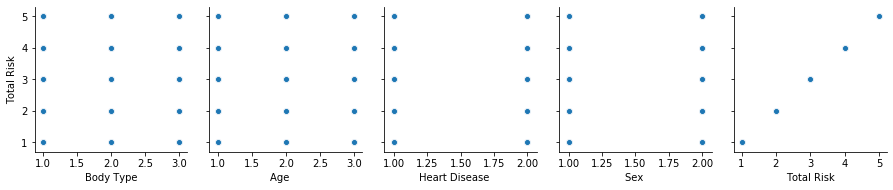

In [477]:



for i in range(0, len(data_typ.columns), 5):
    sns.pairplot(data=data_typ,
                x_vars=data_typ.columns[i:i+5],
                y_vars=['Total Risk'])

### Dividing data into the  values columns ,and the column for the result, i.e. dividing what we want to expect with what makes us expect it

In [293]:
DataTrain_X= data.iloc[:, :-1].values
print(DataTrain_X)

[[2 1 5 ... 2 2 2]
 [2 1 1 ... 2 1 1]
 [2 2 4 ... 3 1 1]
 ...
 [1 1 3 ... 1 1 1]
 [1 1 3 ... 1 1 1]
 [1 1 3 ... 3 1 1]]


In [294]:
DataTrain_y = data.iloc[:, -1].values
print(DataTrain_y)

[4 2 5 ... 2 2 3]


### display the last rows of the dataset

In [295]:
data.tail()

,Physical Disability,Respiratory Disease,Fire Growth Rate,Temperature,Carbon monoxide concentration\n,Carbon Dioxide concentration,Population,Link Length,Familiarity with Building Geometry,Joint -Muscle Disease,Body Type,Age,Heart Disease,Sex,Total Risk
199994,1,1,3,4,4,3,1,2,1,2,3,1,1,2,3
199995,2,2,2,4,2,2,1,1,1,2,3,1,2,1,3
199996,1,1,3,3,4,3,2,1,1,2,1,1,1,1,2
199997,1,1,3,4,1,3,3,1,1,1,1,1,1,1,2
199998,1,1,3,3,4,3,4,3,1,1,1,3,1,1,3


###  Starting with dividing the data into the test group and the training group, we chose 30% of the data for the test and 70% of the data for the training, we have 199,999 data records to divide it

In [296]:
 x_train,x_test,y_train,y_test=train_test_split(DataTrain_X,DataTrain_y,test_size=0.3)

#### Shows the number of rows and columns in groups 

In [297]:
x_train.shape


(139999, 14)

In [298]:
y_train.shape

(139999,)

In [299]:
x_test.shape

(60000, 14)

In [300]:
y_test.shape

(60000,)

## create the model 

#### in our model, we have 14 features as inputs and we have 5 outputs as the risk values for each case, we will create Multi-Layer Perceptron using sci-kit learn, as first, we start by these parameters 

### the first model 

In [303]:
mlp_firstmodel = MLPClassifier(hidden_layer_sizes=(14,14), activation='logistic', solver='adam', max_iter=2000,alpha=0.1,learning_rate_init=0.001,momentum=0.5)


### train the first model 

In [304]:
mlp_firstmodel.fit(x_train,y_train)

MLPClassifier(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(14, 14), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.5, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

#### import libraries from scikit learn to display the accuracy and confusion matrix 

In [305]:
from sklearn.metrics import classification_report, confusion_matrix

#### starting the prediction with the test data group

In [306]:
predictions = mlp_firstmodel.predict(x_test)

#### accuracy and confusion matrix of the first model 

In [307]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 2754    23     0     0     0]
 [   74 15434    10     0     0]
 [    0    77 24430   193     0]
 [    0     0     0 14575     8]
 [    0     0     0   101  2321]]
              precision    recall  f1-score   support

           1       0.97      0.99      0.98      2777
           2       0.99      0.99      0.99     15518
           3       1.00      0.99      0.99     24700
           4       0.98      1.00      0.99     14583
           5       1.00      0.96      0.98      2422

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



#### the first model got high accuracy, however, we want to create another model  to see the different

### the second model

In [308]:
mlp_secondmodel = MLPClassifier(hidden_layer_sizes=(14,14), activation='logistic', solver='adam', max_iter=1500,alpha=0.1,learning_rate_init=0.1,momentum=0.5)


### train the second model

In [309]:
mlp_secondmodel.fit(x_train,y_train)

MLPClassifier(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(14, 14), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=1500,
              momentum=0.5, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

#### starting the prediction with the test data group

In [310]:
predictions_s = mlp_secondmodel.predict(x_test)

#### accuracy and confusion matrix of the second model 

In [311]:
print(confusion_matrix(y_test,predictions_s))
print(classification_report(y_test,predictions_s))

[[ 2719    58     0     0     0]
 [   54 14685   779     0     0]
 [    0     2 24340   358     0]
 [    0     0   379 14204     0]
 [    0     0     0   703  1719]]
              precision    recall  f1-score   support

           1       0.98      0.98      0.98      2777
           2       1.00      0.95      0.97     15518
           3       0.95      0.99      0.97     24700
           4       0.93      0.97      0.95     14583
           5       1.00      0.71      0.83      2422

    accuracy                           0.96     60000
   macro avg       0.97      0.92      0.94     60000
weighted avg       0.96      0.96      0.96     60000



### the third model 

In [312]:
mlp_thirdmodel = MLPClassifier(hidden_layer_sizes=(14,14), activation='logistic', solver='adam', max_iter=2000,alpha=0.1,learning_rate_init=0.2,momentum=0.5)


#### train the third model 

In [313]:
mlp_thirdmodel.fit(x_train,y_train)

MLPClassifier(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(14, 14), learning_rate='constant',
              learning_rate_init=0.2, max_fun=15000, max_iter=2000,
              momentum=0.5, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

#### starting the prediction with the test data group 

In [314]:
predictions_t = mlp_thirdmodel.predict(x_test)

#### accuracy and confusion matrix of the third model

In [315]:
print(confusion_matrix(y_test,predictions_t))
print(classification_report(y_test,predictions_t))

[[    0  2777     0     0     0]
 [    0 15047   471     0     0]
 [    0     0 22913  1787     0]
 [    0     0     0 14576     7]
 [    0     0     0   278  2144]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2777
           2       0.84      0.97      0.90     15518
           3       0.98      0.93      0.95     24700
           4       0.88      1.00      0.93     14583
           5       1.00      0.89      0.94      2422

    accuracy                           0.91     60000
   macro avg       0.74      0.76      0.75     60000
weighted avg       0.87      0.91      0.89     60000



D:\anaconda\anacondaprogram\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### the fourth model 

In [316]:
mlp_fourthhdmodel = MLPClassifier(hidden_layer_sizes=(14,14), activation='relu', solver='sgd', max_iter=2000,alpha=0.1,learning_rate_init=0.1,momentum=0.5)


#### train the fourth model 

In [317]:
mlp_fourthhdmodel.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(14, 14), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=2000,
              momentum=0.5, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

####  starting the prediction with the test data group

In [318]:
predictions_f = mlp_fourthhdmodel.predict(x_test)

#### accuracy and confusion matrix of the fourth model

In [319]:
print(confusion_matrix(y_test,predictions_f))
print(classification_report(y_test,predictions_f))

[[ 2777     0     0     0     0]
 [  247 11534  3737     0     0]
 [    0    15 24685     0     0]
 [    0     0  3150 11433     0]
 [    0     0     0  2422     0]]
              precision    recall  f1-score   support

           1       0.92      1.00      0.96      2777
           2       1.00      0.74      0.85     15518
           3       0.78      1.00      0.88     24700
           4       0.83      0.78      0.80     14583
           5       0.00      0.00      0.00      2422

    accuracy                           0.84     60000
   macro avg       0.70      0.71      0.70     60000
weighted avg       0.82      0.84      0.82     60000



D:\anaconda\anacondaprogram\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## read the test dataset 

In [320]:
datatest=pd.read_csv('D:/DataSet/FINAL_DATASET_TESTCASE_csv.csv')

#### describe the test data set 

In [321]:
datatest.head()

,Physical Disability,Respiratory Disease,Fire Growth Rate,Temperature,Carbon monoxide concentration,Carbon Dioxide concentration,Population,Link Length,Familiarity with Building Geometry,Joint -Muscle Disease,Body Type,Age,Heart Disease,Sex,Total Risk
0,2,2,2,3,2,1,4,2,2,1,2,2,1,2,3
1,1,2,3,4,1,1,1,1,1,2,3,3,1,2,3
2,2,1,4,3,4,1,2,3,2,1,3,1,2,1,4
3,1,2,3,2,4,1,4,2,1,2,3,3,2,2,3
4,1,1,4,4,4,3,1,2,1,2,1,1,1,2,3


In [322]:
datatest.tail()

,Physical Disability,Respiratory Disease,Fire Growth Rate,Temperature,Carbon monoxide concentration,Carbon Dioxide concentration,Population,Link Length,Familiarity with Building Geometry,Joint -Muscle Disease,Body Type,Age,Heart Disease,Sex,Total Risk
1494,1,1,5,4,1,2,4,2,1,2,3,1,1,1,3
1495,2,2,1,3,4,1,1,3,2,2,3,2,1,2,3
1496,2,1,3,2,2,2,4,2,1,2,3,1,2,2,3
1497,2,1,3,2,1,1,3,3,1,2,2,1,1,2,3
1498,2,2,4,1,5,1,3,3,1,2,3,3,2,1,4


In [323]:
print(datatest["Total Risk"].min())

print(datatest["Total Risk"].max())

print(datatest["Total Risk"].mean())

1
5
2.971981320880587


In [334]:
datatest.describe()


,Physical Disability,Respiratory Disease,Fire Growth Rate,Temperature,Carbon monoxide concentration,Carbon Dioxide concentration,Population,Link Length,Familiarity with Building Geometry,Joint -Muscle Disease,Body Type,Age,Heart Disease,Sex,Total Risk
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.00000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.00000,1499.000000
mean,1.492995,1.515010,2.965310,2.519013,3.00467,1.979320,2.509673,2.010007,1.482989,1.511007,2.000667,2.002001,1.513009,1.48966,2.971981
std,0.500118,0.499941,1.394294,1.136307,1.42385,0.826933,1.118664,0.827938,0.499877,0.500046,0.809242,0.820707,0.499998,0.50006,0.935440
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,2.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2.000000
50%,1.000000,2.000000,3.000000,3.000000,3.00000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.00000,3.000000
75%,2.000000,2.000000,4.000000,4.000000,4.00000,3.000000,4.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.00000,4.000000
max,2.000000,2.000000,5.000000,4.000000,5.00000,3.000000,4.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.00000,5.000000


### split the test dataset

In [324]:
DataTrain_X_test= datatest.iloc[:, :-1].values
print(DataTrain_X_test.shape)

(1499, 14)


In [325]:
DataTrain_y_test= datatest.iloc[:, -1].values
print(DataTrain_y_test.shape)

(1499,)


### test the first model 

In [326]:
predictions_t1 = mlp_firstmodel.predict(DataTrain_X_test)

#### result of the test

In [327]:
print(confusion_matrix(DataTrain_y_test,predictions_t1))
print(classification_report(DataTrain_y_test,predictions_t1))

[[ 79   0   0   0   0]
 [  1 370   1   0   0]
 [  0   1 623   4   0]
 [  0   0   0 352   0]
 [  0   0   0   2  66]]
              precision    recall  f1-score   support

           1       0.99      1.00      0.99        79
           2       1.00      0.99      1.00       372
           3       1.00      0.99      1.00       628
           4       0.98      1.00      0.99       352
           5       1.00      0.97      0.99        68

    accuracy                           0.99      1499
   macro avg       0.99      0.99      0.99      1499
weighted avg       0.99      0.99      0.99      1499



### test the second model 

In [328]:
predictions_t2 =mlp_secondmodel.predict(DataTrain_X_test)

#### result of the test

In [329]:
print(confusion_matrix(DataTrain_y_test,predictions_t2))
print(classification_report(DataTrain_y_test,predictions_t2))

[[ 78   1   0   0   0]
 [  2 345  25   0   0]
 [  0   0 618  10   0]
 [  0   0   9 343   0]
 [  0   0   0  16  52]]
              precision    recall  f1-score   support

           1       0.97      0.99      0.98        79
           2       1.00      0.93      0.96       372
           3       0.95      0.98      0.97       628
           4       0.93      0.97      0.95       352
           5       1.00      0.76      0.87        68

    accuracy                           0.96      1499
   macro avg       0.97      0.93      0.95      1499
weighted avg       0.96      0.96      0.96      1499



### test the third model 

In [330]:
predictions_t3 =mlp_thirdmodel.predict(DataTrain_X_test)

####  result of the test 

In [331]:
print(confusion_matrix(DataTrain_y_test,predictions_t3))
print(classification_report(DataTrain_y_test,predictions_t3))

[[  0  79   0   0   0]
 [  0 361  11   0   0]
 [  0   0 570  58   0]
 [  0   0   0 352   0]
 [  0   0   0   6  62]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        79
           2       0.82      0.97      0.89       372
           3       0.98      0.91      0.94       628
           4       0.85      1.00      0.92       352
           5       1.00      0.91      0.95        68

    accuracy                           0.90      1499
   macro avg       0.73      0.76      0.74      1499
weighted avg       0.86      0.90      0.87      1499



D:\anaconda\anacondaprogram\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### test the fourth model 

In [332]:
predictions_t4 =mlp_fourthhdmodel.predict(DataTrain_X_test)

#### result of the test

In [333]:
print(confusion_matrix(DataTrain_y_test,predictions_t4))
print(classification_report(DataTrain_y_test,predictions_t4))

[[ 79   0   0   0   0]
 [  8 282  82   0   0]
 [  0   0 628   0   0]
 [  0   0  67 285   0]
 [  0   0   0  68   0]]
              precision    recall  f1-score   support

           1       0.91      1.00      0.95        79
           2       1.00      0.76      0.86       372
           3       0.81      1.00      0.89       628
           4       0.81      0.81      0.81       352
           5       0.00      0.00      0.00        68

    accuracy                           0.85      1499
   macro avg       0.70      0.71      0.70      1499
weighted avg       0.82      0.85      0.83      1499



D:\anaconda\anacondaprogram\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####  save the models 

In [487]:
with open('model.pkl', 'wb') as model_file:
    pickle.dump(mlp_firstmodel, model_file)

with open('model_1.pkl', 'wb') as model_file:
    pickle.dump(mlp_secondmodel, model_file)


with open('model_2.pkl', 'wb') as model_file:
    pickle.dump(mlp_thirdmodel, model_file)
    
 

## functions to classify the gathered data 

In [118]:
def tempconvert( x ):
      if x < 45:
        return 1
      elif x< 75:
        return 2
      elif x < 150:
        return 3
      elif x > 150:
        return 4


In [119]:
def Cmonoxideconvert( x ):
      if x <= 0:
        return 1
      elif x<= 100:
        return 2
      elif x <=6400:
        return 3
      elif x <= 12600:
        return 4
      elif x > 12601:
        return 5

In [348]:
def Cdioxideconvert( x ):
      if x <= 1000:
        return 1
      elif x<= 5000:
        return 2
      elif x >5001:
        return 3
    

In [121]:
def Populationconvert( x ):
      if x <=0.8:
        return 1
      elif x<= 1.8:
        return 2
      elif x <=4:
        return 3
      elif x > 4:
        return 4

In [122]:
def LLengthconvert( x ):
      if x <=10:
        return 3
      elif x<= 30:
        return 2
      elif x >30:
        return 1
     

In [123]:
def ageconvert( x ):
      if x <=40:
        return 1
      elif x<= 60:
        return 2
      elif x >60:
        return 3
     

In [124]:
def bodyconvert( x ):
      if x =="Athlete":
        return 1
      elif x== "Normal":
        return 2
      elif x =="Obese":
        return 3

In [125]:
def FGRateconvert( x ):
      if x <=0:
        return 1
      elif x<= 0.0058:
        return 2
      elif x<=0.024:
        return 3
      elif x <=0.094:
        return 4
      elif x >0.094:
        return 5

In [220]:
def Binaryconvert( x ):
      if x is True:
        return 1
      elif x is False:
        return 2
     

In [222]:
def versaBinaryconvert( x ):
      if x is True:
        return 2
      elif x is False:
        return 1
     

## functions to generate missing data 

In [128]:
def gen_fgr():
    
    

    value = random()
    return(value)*0.05

In [129]:
def gen_temp():
    
    value =randint(0,300)
    return(value)

In [130]:
def gen_cm():
    
    value =randint(0,14000)
    return(value)

In [131]:
def gen_cd():
    
    value =randint(0,42000)
    return(value)

In [135]:
def gen_pu():
    
    value_people =randint(0,20)
    value_area =randint(2,10)
    xs=value_people/value_area
    return(xs)

In [136]:
def gen_ll():
    
    value =randint(0,50)
    return(value)

#### function to write on existing CSV to collect all the needed data in one file for predictions

In [254]:
from csv import writer

def append_row(list_of_elem):
    # Open file in append mode
    with open('create_reco.csv', 'a+', newline='') as write_obj:
        # Create a writer object from csv module
        csv_writer = writer(write_obj)
        # Add contents of list as last row in the csv file
        csv_writer.writerow(list_of_elem)
 

### this function is created to gather all the data by taking personal data from the database and generate missing data, alongside with classifying all the values and write it in the CSV file  

In [461]:
def gen_FullRecored(pd,rd,fwb,jmd,bt,age,hd,sexF):
    PD=versaBinaryconvert(pd)
    RD=versaBinaryconvert(rd)
    FGR=FGRateconvert(gen_fgr())
    TEMP=tempconvert(gen_temp())
    CM=Cmonoxideconvert(gen_cm())
    CD=Cdioxideconvert(gen_cd())
    PU=Populationconvert(gen_pu())
    LL=LLengthconvert(gen_ll())
    FWB=Binaryconvert(fwb)
    JMD=versaBinaryconvert(jmd)
    BT=bodyconvert(bt)
    AGE=ageconvert(age)
    HD=versaBinaryconvert(hd)
    if bool(sexF) ==True:
        SEX=2
    elif bool(sexF) ==False:
         SEX=1
   
         
    reco=[PD,RD,FGR,TEMP,CM,CD,PU,LL,FWB,JMD,BT,AGE,HD,SEX]
    append_row(reco)
    

### all the personal factors that we need to determine and classify the risk, are collected through the phone application of our system (Siren), and saved in firebase database, so we connect to the database to get all the data 

In [13]:
firebase = firebase.FirebaseApplication('https://coastal-arcana-274814.firebaseio.com/', None)


#### reading the datas

In [81]:
result = firebase.get('/Persons/',None)
print(result)

{'-M5OfmXb0lncHysI-cVN': {'Age': '22', 'Bloodtype': 'A+', 'Female': True, 'Heart_d': True, 'KnowTheBuilding': True, 'Male': False, 'Muscle_d': False, 'Password': '123', 'Physical_d': True, 'Resp_d': False, 'Username': 'lama', 'Weight': 'Obese'}, '-M5Og6vfEJ8PmrRZD41w': {'Age': '70', 'Bloodtype': 'B+', 'Female': True, 'Heart_d': True, 'KnowTheBuilding': True, 'Male': False, 'Muscle_d': False, 'Password': '888', 'Physical_d': True, 'Resp_d': False, 'Username': 'jana', 'Weight': 'Obese'}, '-M5OgK5-Tg93cGdW_fGW': {'Age': '45', 'Bloodtype': 'O-', 'Female': False, 'Heart_d': False, 'KnowTheBuilding': True, 'Male': True, 'Muscle_d': False, 'Password': '555', 'Physical_d': False, 'Resp_d': True, 'Username': 'khal', 'Weight': 'Athlete'}}


#### after reading the data and take what we consider and ignore the rest, we pass the values to the previous function that gather and generate, classify, and writing to CSV  

In [462]:
for res in result.items():

    gen_FullRecored(res[1]['Physical_d'],res[1]['Resp_d'],res[1]['KnowTheBuilding'],res[1]['Muscle_d'],res[1]['Weight'],int(res[1]['Age']),res[1]['Heart_d'],res[1]['Female'])  

#### now let's see the file, where all the user's values are stored in alongside with generated environmental data

In [463]:
newdata=pd.read_csv("create_reco.csv")

In [464]:
newdata.describe()

,Physical Disability,Respiratory Disease,Fire Growth Rate,Temperature,Carbon monoxide concentration,Carbon Dioxide concentration,Population,Link Length,Familiarity with Building Geometry,Joint -Muscle Disease,Body Type,Age,Heart Disease,Sex
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.0,18.000000,18.000000,18.000000,18.000000
mean,1.666667,1.333333,3.277778,2.833333,3.722222,2.944444,2.388889,2.055556,1.0,1.0,2.333333,2.000000,1.666667,1.666667
std,0.485071,0.485071,0.669113,1.150447,0.669113,0.235702,0.978528,0.872604,0.0,0.0,0.970143,0.840168,0.485071,0.485071
min,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,3.000000,2.250000,3.000000,3.000000,2.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,2.500000,2.000000,1.0,1.0,3.000000,2.000000,2.000000,2.000000
75%,2.000000,2.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,1.0,1.0,3.000000,3.000000,2.000000,2.000000
max,2.000000,2.000000,4.000000,4.000000,5.000000,3.000000,4.000000,3.000000,1.0,1.0,3.000000,3.000000,2.000000,2.000000


In [465]:
newdata.head()

,Physical Disability,Respiratory Disease,Fire Growth Rate,Temperature,Carbon monoxide concentration,Carbon Dioxide concentration,Population,Link Length,Familiarity with Building Geometry,Joint -Muscle Disease,Body Type,Age,Heart Disease,Sex
0,2,1,3,4,3,3,4,3,1,1,3,1,2,2
1,2,1,4,3,3,3,2,1,1,1,3,3,2,2
2,1,2,3,2,4,3,1,2,1,1,1,2,1,1
3,2,1,3,3,3,3,2,1,1,1,3,1,2,2
4,2,1,3,1,3,3,3,1,1,1,3,3,2,2


##### shape of the collected data where you can see is 14 features, the total risk is not predicted yet 

In [479]:
print(newdatainsert.shape)

(18, 14)


##### just in case some of the values are missing we fill the nan values with the mean of the dataset

In [467]:
newdata.fillna(newdata.mean())


,Physical Disability,Respiratory Disease,Fire Growth Rate,Temperature,Carbon monoxide concentration,Carbon Dioxide concentration,Population,Link Length,Familiarity with Building Geometry,Joint -Muscle Disease,Body Type,Age,Heart Disease,Sex
0,2,1,3,4,3,3,4,3,1,1,3,1,2,2
1,2,1,4,3,3,3,2,1,1,1,3,3,2,2
2,1,2,3,2,4,3,1,2,1,1,1,2,1,1
3,2,1,3,3,3,3,2,1,1,1,3,1,2,2
4,2,1,3,1,3,3,3,1,1,1,3,3,2,2
5,1,2,4,4,3,3,2,2,1,1,1,2,1,1
6,2,1,3,1,4,3,3,2,1,1,3,1,2,2
7,2,1,4,3,4,3,1,1,1,1,3,3,2,2
8,1,2,3,3,4,3,2,2,1,1,1,2,1,1
9,2,1,3,1,4,2,3,3,1,1,3,1,2,2


In [468]:
newdata.head()

,Physical Disability,Respiratory Disease,Fire Growth Rate,Temperature,Carbon monoxide concentration,Carbon Dioxide concentration,Population,Link Length,Familiarity with Building Geometry,Joint -Muscle Disease,Body Type,Age,Heart Disease,Sex
0,2,1,3,4,3,3,4,3,1,1,3,1,2,2
1,2,1,4,3,3,3,2,1,1,1,3,3,2,2
2,1,2,3,2,4,3,1,2,1,1,1,2,1,1
3,2,1,3,3,3,3,2,1,1,1,3,1,2,2
4,2,1,3,1,3,3,3,1,1,1,3,3,2,2


#### using all the models to predict the risk and we can notice that the first three are the same and the accuracy of these models got 90 or more, however, we can see that the fourth model have two different risk value for the same record this model is the one who got less than 90 

In [469]:
print(mlp_firstmodel.predict(newdatainsert))

[4 4 3 3 3 4 3 4 3 3 4 3 4 4 4 4 3 3]


In [470]:
print(mlp_secondmodel.predict(newdatainsert))

[4 4 3 3 3 4 3 4 3 3 4 3 4 4 4 4 3 3]


In [471]:
print(mlp_thirdmodel.predict(newdatainsert))

[4 4 3 3 3 4 3 4 3 3 4 3 4 4 4 4 3 4]


In [472]:
print(mlp_fourthhdmodel.predict(newdatainsert))

[4 4 3 3 3 3 3 4 3 3 4 3 4 4 3 4 3 3]
